# Scikit-learn Exercise (5 points)

The homework assignment is due by the end of the day on Tuesday, October 28.

Please make sure to solve the assignment problems yourself and obey the university's policies on academic honesty and integrity. Remember that copying and pasting solutions from AI coding assistants, webpages, classmates, or anywhere else is considered plagiarism and academic dishonesty.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solution to a problem uses functions or codes that are not covered in the lecture notes, that will result in zero marks assigned for that problem.**

To ensure that all cells in the submitted notebooks execute correctly and without errors, after completing all problems and before submitting the notebook, it is recommended to select `Kernel -> Restart Kernel and Run All Cells...`.

Scikit-learn exercise: 5 points

Total points for Assignment 4: 25 points

Import the file `NewYork_1980_data` from the `data` folder as a pandas DataFrame called `features`. The data contains information about the adult population in New York from 1980. The goal of this exercise is to predict the income of a person based on the provided data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Assignment_4_October_8/data/NewYork_1980_data.csv'
features = pd.read_csv(file_path)

## Exploratory Data Analysis (1 point)

Display summary statistics, and state the number of samples and features in the dataset. Are there any features for which the statistics show something unusual?

In [ ]:
features.head()

features.describe()

print("Number of samples and features:", features.shape)

print("\nData types of each column:\n", features.dtypes)

Number of samples and features: (48787, 14)

Data types of each column:
 age                 int64
workclass         float64
education         float64
education-num       int64
marital-status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital-gain        int64
capital-loss      float64
hours-per-week      int64
native-country    float64
income              int64
dtype: object


### Explore Column Information

Check the number of categories and counts for the `income` feature. Create a bar plot for this feature.

income
0    37108
1    11679
Name: count, dtype: int64

Number of unique categories in 'income': 2


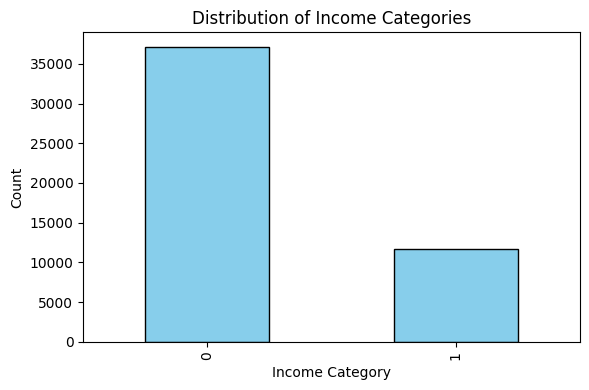

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(features['income'].value_counts())
print("\nNumber of unique categories in 'income':", features['income'].nunique())

plt.figure(figsize=(6,4))
features['income'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Check the counts for other columns. If there are any duplicate columns, remove them.

In [ ]:
print("Counts of non-missing values in each column:\n")
print(features.count())

duplicate_columns = features.columns[features.columns.duplicated()]
print("\nDuplicate columns:", list(duplicate_columns))

if len(duplicate_columns) > 0:
    features = features.loc[:, ~features.columns.duplicated()]
    print("\nDuplicate columns removed.")
else:
    print("\nNo duplicate columns found.")

print("\nDataset shape after duplicate removal:", features.shape)

Counts of non-missing values in each column:

age               48787
workclass         48787
education         48787
education-num     48787
marital-status    48787
occupation        48787
relationship      48787
race              48787
sex               48787
capital-gain      48787
capital-loss      48787
hours-per-week    48787
native-country    48787
income            48787
dtype: int64

Duplicate columns: []

No duplicate columns found.

Dataset shape after duplicate removal: (48787, 14)


### Handle missing values

Check if there are any missing values. If yes, for some features remove the rows with missing values, and for some features replace the missing values with the average value of the column.

In [ ]:
print("Missing values per column:\n")
print(features.isnull().sum())

missing_cols = features.columns[features.isnull().any()]
print("\nColumns with missing values:", list(missing_cols))

features = features.dropna(subset=['sex', 'capital-loss'], how='any')

for col in ['age', 'hours-per-week']:
    if col in features.columns:
        mean_value = features[col].mean()
        features[col].fillna(mean_value, inplace=True)

print("\nMissing values after cleaning:\n")
print(features.isnull().sum())

print("\nDataset shape after handling missing values:", features.shape)

Missing values per column:

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Columns with missing values: []

Missing values after cleaning:

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Dataset shape after handling missing values: (48787, 14)


/tmp/ipython-input-3762494117.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].fillna(mean_value, inplace=True)


### Check Feature Distribution

Create a histogram plot of the numerical features.

Numerical features:
 ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


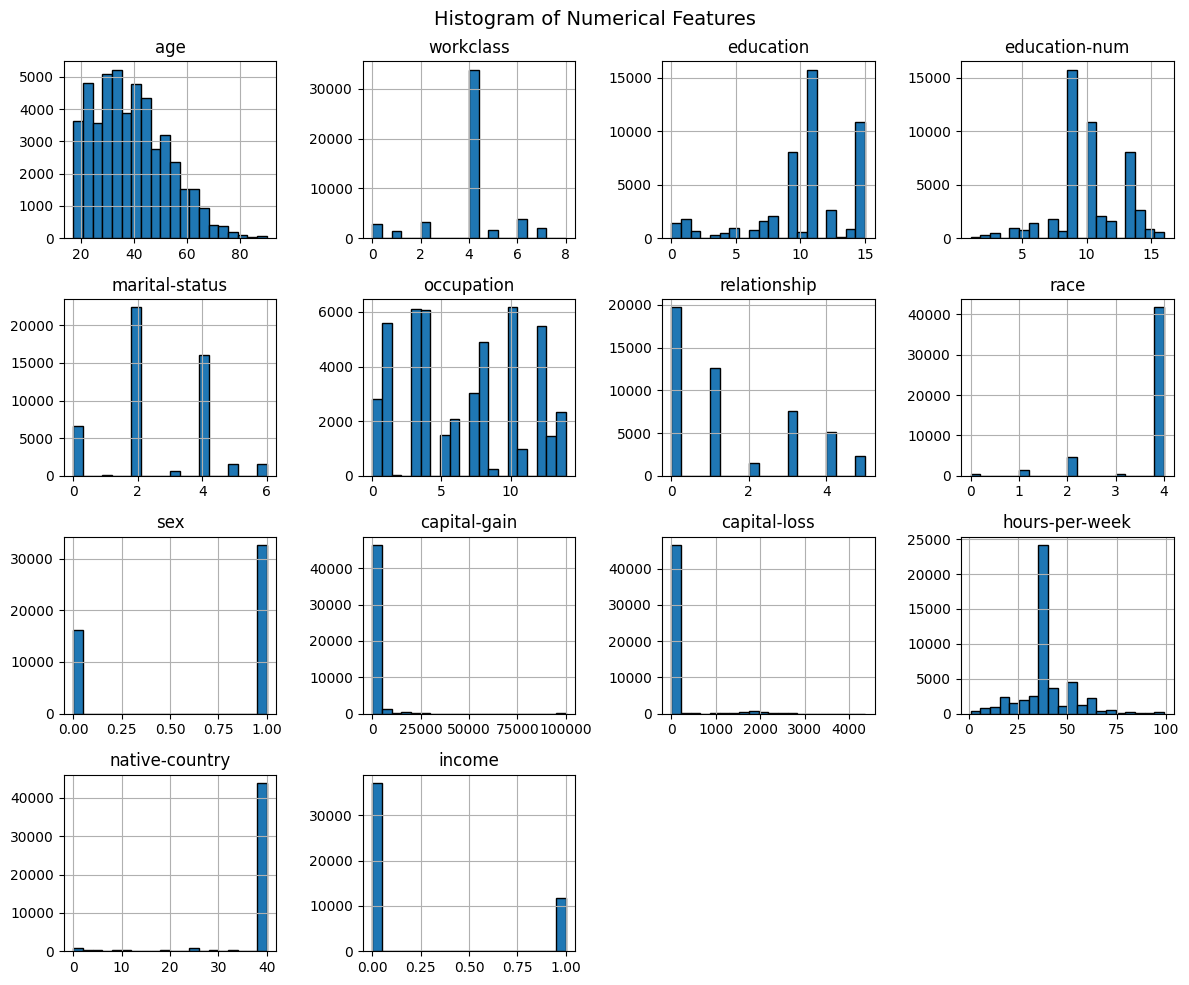

In [ ]:
numeric_features = features.select_dtypes(include=[np.number])

print("Numerical features:\n", numeric_features.columns.tolist())

numeric_features.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

Plot the distributions of `age` and `hours-per-week`. Based on the plots, state the approximate average values for these two features.

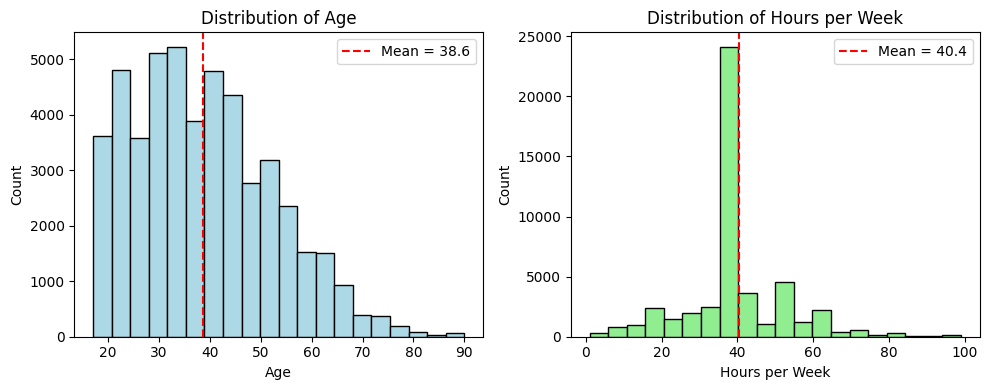

Approximate average age: 38.64
Approximate average hours per week: 40.42


In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(features['age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(features['age'].mean(), color='red', linestyle='--', label=f"Mean = {features['age'].mean():.1f}")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(features['hours-per-week'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.axvline(features['hours-per-week'].mean(), color='red', linestyle='--', label=f"Mean = {features['hours-per-week'].mean():.1f}")
plt.legend()

plt.tight_layout()
plt.show()

print("Approximate average age:", round(features['age'].mean(), 2))
print("Approximate average hours per week:", round(features['hours-per-week'].mean(), 2))

Using Seaborn, create a bar plot of the `occupation` feature with sub-bars (hue) for the `sex` feature.

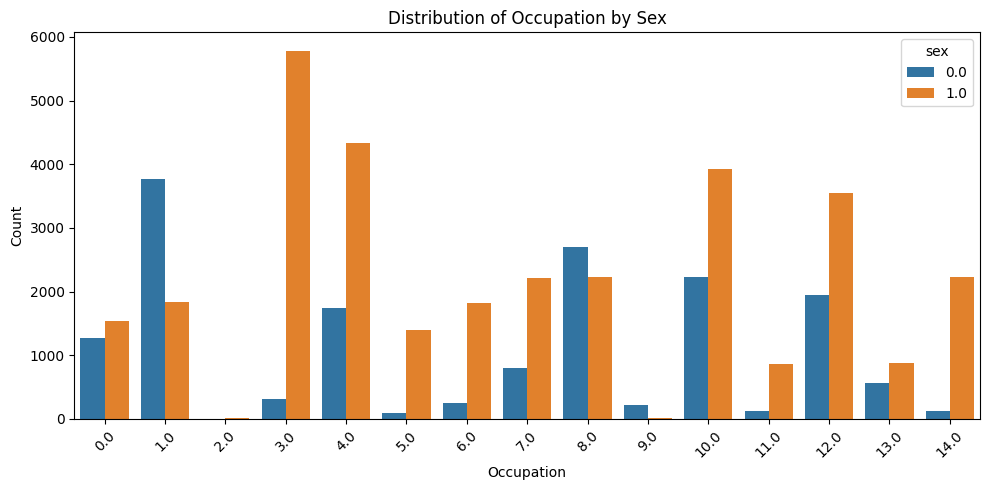

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.countplot(data=features, x='occupation', hue='sex')

plt.title('Distribution of Occupation by Sex')
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Check Correlated Features

Calculate the correlation between the numerical features, and plot a heatmap of the correlations. Are there any features that are highly correlated?

Correlation matrix:

                     age  workclass  education  education-num  marital-status  \
age             1.000000   0.017738  -0.015027       0.030984       -0.263887   
workclass       0.017738   1.000000   0.017187       0.055896       -0.068593   
education      -0.015027   0.017187   1.000000       0.359748       -0.037453   
education-num   0.030984   0.055896   0.359748       1.000000       -0.070173   
marital-status -0.263887  -0.068593  -0.037453      -0.070173        1.000000   
occupation     -0.014169   0.259900  -0.021083       0.112299       -0.017548   
relationship   -0.263648  -0.092705  -0.010860      -0.090636        0.188268   
race            0.028548   0.052906   0.013263       0.029032       -0.070295   
sex             0.088182   0.091332  -0.027105       0.009260       -0.127649   
capital-gain    0.077221   0.036080   0.028926       0.125148       -0.044001   
capital-loss    0.057086   0.010840   0.017632       0.080834       -0.034222   
hours-p

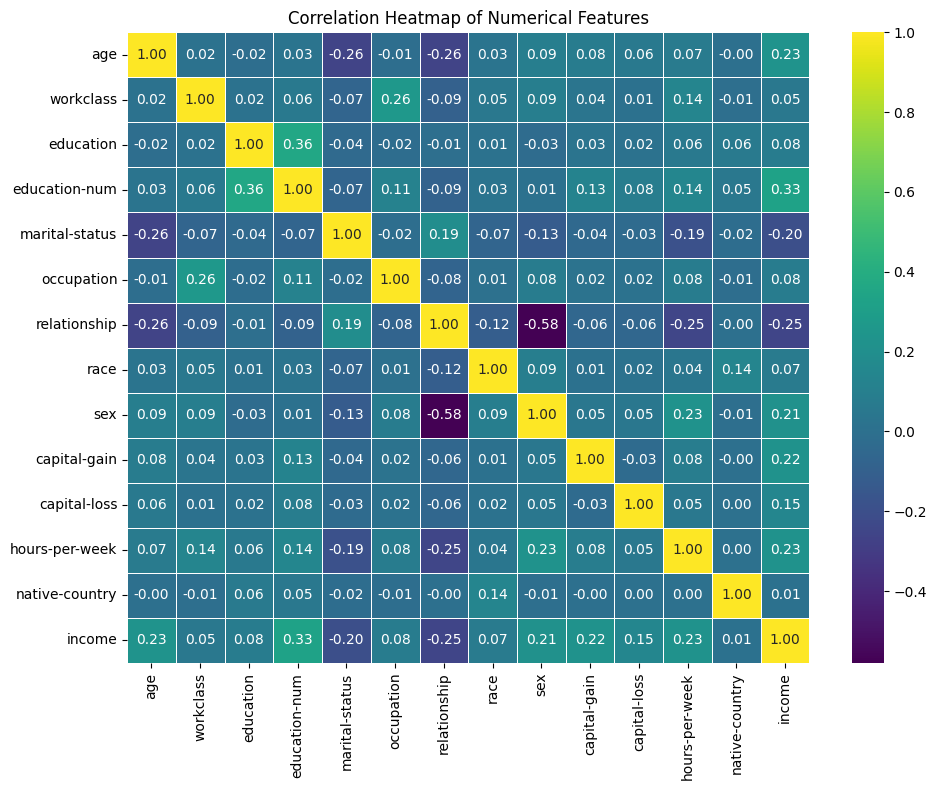


Highly correlated feature pairs (|corr| > 0.8):
                age  workclass  education  education-num  marital-status  \
age             1.0        NaN        NaN            NaN             NaN   
workclass       NaN        1.0        NaN            NaN             NaN   
education       NaN        NaN        1.0            NaN             NaN   
education-num   NaN        NaN        NaN            1.0             NaN   
marital-status  NaN        NaN        NaN            NaN             1.0   
occupation      NaN        NaN        NaN            NaN             NaN   
relationship    NaN        NaN        NaN            NaN             NaN   
race            NaN        NaN        NaN            NaN             NaN   
sex             NaN        NaN        NaN            NaN             NaN   
capital-gain    NaN        NaN        NaN            NaN             NaN   
capital-loss    NaN        NaN        NaN            NaN             NaN   
hours-per-week  NaN        NaN        N

In [ ]:
numeric_features = features.select_dtypes(include=[np.number])

corr_matrix = numeric_features.corr()

print("Correlation matrix:\n")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

high_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]
print("\nHighly correlated feature pairs (|corr| > 0.8):")
print(high_corr)

### Encoding Categorical Features

Use the Ordinal Encoder in scikit-learn to encode all columns with text data, except for the column `income`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
if 'income' in categorical_cols:
    categorical_cols.remove('income')

print("Categorical columns to be encoded:\n", categorical_cols)

encoder = OrdinalEncoder()

features[categorical_cols] = encoder.fit_transform(features[categorical_cols])

print("\nEncoded DataFrame (first 5 rows):")
print(features.head())

print("\nUnique values in 'income':", features['income'].unique())

Categorical columns to be encoded:
 []

Encoded DataFrame (first 5 rows):
   age  workclass  education  education-num  marital-status  occupation  \
0   25        4.0        1.0              7             4.0         7.0   
1   38        4.0       11.0              9             2.0         5.0   
2   28        2.0        7.0             12             2.0        11.0   
3   44        4.0       15.0             10             2.0         7.0   
4   18        0.0       15.0             10             4.0         0.0   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0           3.0   2.0  1.0             0           0.0              40   
1           0.0   4.0  1.0             0           0.0              50   
2           0.0   4.0  1.0             0           0.0              40   
3           0.0   2.0  1.0          7688           0.0              40   
4           3.0   4.0  0.0             0           0.0              30   

   native-country  income  
0 

Use the Label Encoder in scikit-learn to encode the feature `income`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

features['income'] = label_encoder.fit_transform(features['income'])

print("Encoded 'income' feature values:\n", features['income'].unique())

income_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nMapping of income categories to encoded labels:\n", income_mapping)

features.head()

Encoded 'income' feature values:
 [0 1]

Mapping of income categories to encoded labels:
 {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4.0,1.0,7,4.0,7.0,3.0,2.0,1.0,0,0.0,40,38.0,0
1,38,4.0,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0.0,50,38.0,0
2,28,2.0,7.0,12,2.0,11.0,0.0,4.0,1.0,0,0.0,40,38.0,1
3,44,4.0,15.0,10,2.0,7.0,0.0,2.0,1.0,7688,0.0,40,38.0,1
4,18,0.0,15.0,10,4.0,0.0,3.0,4.0,0.0,0,0.0,30,38.0,0


### Scaling Numerical Features

Create target labels named `y` consisting of the `income` column, and a data label named `X` including all remaining columns.

In [ ]:
y = features['income']

X = features.drop('income', axis=1)

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (48787, 13)
Shape of y (target): (48787,)


Split the data and targets into train and test sets, where the test set will be 25% of all data. Use a random seed of 123. Print the shapes of the train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print("Training data inputs:", X_train.shape)
print("Training labels:", y_train.shape)
print("Testing data inputs:", X_test.shape)
print("Testing labels:", y_test.shape)

Training data inputs: (36590, 13)
Training labels: (36590,)
Testing data inputs: (12197, 13)
Testing labels: (12197,)


Use standardization to scale all columns in the data to have 0 mean and 1 standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Training data after standardization:", X_train_scaled.shape)
print("Testing data after standardization:", X_test_scaled.shape)

Training data after standardization: (36590, 13)
Testing data after standardization: (12197, 13)


## Training Classifiers (2 points)

Train all 8 studied classifiers on the training set and evaluate the accuracy on the test set. Use the default values for the classifiers, unless instructed otherwise in the following lines.
They include:
- k-Nearest Neighbors
- SVM (use the linear kernel)
- Logistic Regression
- Decision Trees
- Random Forest (use at least 50 estimators)
- Naive Bayes (GaussianNB)
- Perceptron (try different number of epochs and learning rate)
- SGD (use 'hinge' loss, at least 50 iterations)

Report which models have the best performance.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=[np.number]).columns

train_means = X_train[num_cols].mean()
X_train[num_cols] = X_train[num_cols].fillna(train_means)
X_test[num_cols]  = X_test[num_cols].fillna(train_means)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X.columns, index=X_test.index)

results = {}

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
results['kNN'] = knn.score(X_test_scaled, y_test)

lin_svm = LinearSVC()
lin_svm.fit(X_train_scaled, y_train)
results['Linear SVM'] = lin_svm.score(X_test_scaled, y_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
results['Logistic Regression'] = lr.score(X_test_scaled, y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
results['Decision Tree'] = dt.score(X_test, y_test)

rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)
results['Random Forest (100)'] = rf.score(X_test, y_test)

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
results['GaussianNB'] = nb.score(X_test_scaled, y_test)

perceptron_candidates = []
for max_iter in [40, 80]:
    for eta in [0.1, 0.001]:
        ppn = Perceptron(max_iter=max_iter, eta0=eta)
        ppn.fit(X_train_scaled, y_train)
        acc = ppn.score(X_test_scaled, y_test)
        perceptron_candidates.append((f'Perceptron (iter={max_iter}, eta0={eta})', acc))

best_ppn_name, best_ppn_acc = max(perceptron_candidates, key=lambda t: t[1])
results[best_ppn_name] = best_ppn_acc

sgd = SGDClassifier(max_iter=80, loss='hinge', random_state=1)
sgd.fit(X_train_scaled, y_train)
results['SGD (hinge, iter=80)'] = sgd.score(X_test_scaled, y_test)

print("\nTest Accuracies:")
for name, acc in results.items():
    print(f"{name:30s}: {acc*100:6.2f}%")

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
top_acc = sorted_results[0][1]
best_models = [name for name, acc in sorted_results if acc == top_acc]

print("\nBest performance:")
for name in best_models:
    print(f"- {name}: {top_acc*100:6.2f}%")


Test Accuracies:
kNN                           :  83.10%
Linear SVM                    :  82.35%
Logistic Regression           :  82.23%
Decision Tree                 :  81.73%
Random Forest (100)           :  84.83%
GaussianNB                    :  80.55%
Perceptron (iter=40, eta0=0.1):  77.41%
SGD (hinge, iter=80)          :  82.45%

Best performance:
- Random Forest (100):  84.83%


## Hyperparameter Tuning (1 point)

For the two best-performing approaches, perform hyperparameter tuning. Use a grid search for one approach with at least 5 values, and a random search for the other approach with at least 10 samples from the distribution. Choose between 1 and 3 hyperparameters, based on the used classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

num_cols = X_train.select_dtypes(include=[np.number]).columns
train_means = X_train[num_cols].mean()
X_train[num_cols] = X_train[num_cols].fillna(train_means)
X_test[num_cols]  = X_test[num_cols].fillna(train_means)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

results = {}

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
results['kNN'] = knn.score(X_test_scaled, y_test)

lin_svm = LinearSVC()
lin_svm.fit(X_train_scaled, y_train)
results['Linear SVM'] = lin_svm.score(X_test_scaled, y_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
results['Logistic Regression'] = lr.score(X_test_scaled, y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
results['Decision Tree'] = dt.score(X_test, y_test)

rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)
results['Random Forest'] = rf.score(X_test, y_test)

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
results['GaussianNB'] = nb.score(X_test_scaled, y_test)

perceptron_candidates = []
for max_iter in [40, 80]:
    for eta in [0.1, 0.001]:
        ppn = Perceptron(max_iter=max_iter, eta0=eta)
        ppn.fit(X_train_scaled, y_train)
        acc = ppn.score(X_test_scaled, y_test)
        perceptron_candidates.append((f'Perceptron(iter={max_iter},eta0={eta})', acc))
best_ppn_name, best_ppn_acc = max(perceptron_candidates, key=lambda t: t[1])
results[best_ppn_name] = best_ppn_acc

sgd = SGDClassifier(max_iter=80, loss='hinge', random_state=1)
sgd.fit(X_train_scaled, y_train)
results['SGD (hinge)'] = sgd.score(X_test_scaled, y_test)

print("Base test accuracies:")
for name, acc in results.items():
    print(f"{name:28s}: {acc*100:6.2f}%")

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
top1_name, top1_acc = sorted_results[0]
top2_name, top2_acc = sorted_results[1]
print("\nTop-2 models:")
print(f"1) {top1_name}: {top1_acc*100:6.2f}%")
print(f"2) {top2_name}: {top2_acc*100:6.2f}%")

def get_model_and_search_space(name, search_type='grid'):
    scoring = 'accuracy'
    n_iter = 10

    if 'kNN' in name:
        est = neighbors.KNeighborsClassifier()
        Xtr, Xte = X_train_scaled, X_test_scaled
        if search_type == 'grid':
            params = {'n_neighbors': [3, 5, 7, 9, 11, 13]}
        else:
            params = {'n_neighbors': randint(3, 31)}
    elif 'SVM' in name:
        est = SVC()
        Xtr, Xte = X_train_scaled, X_test_scaled
        if search_type == 'grid':
            params = {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 'kernel': ['linear', 'rbf', 'poly']}
        else:
            params = {'C': uniform(0.01, 100)}
    elif 'Logistic Regression' in name:
        est = LogisticRegression()
        Xtr, Xte = X_train_scaled, X_test_scaled
        if search_type == 'grid':
            params = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
        else:
            params = {'C': uniform(0.01, 100)}
    elif 'Random Forest' in name:
        est = RandomForestClassifier(random_state=123)
        Xtr, Xte = X_train, X_test
        if search_type == 'grid':
            params = {
                'n_estimators': [50, 80, 100, 150, 200],
                'max_depth': [4, 6, 8, 10, 12]
            }
        else:
            params = {
                'n_estimators': randint(50, 201),
                'max_depth': randint(4, 21),
                'min_samples_leaf': randint(1, 50)
            }
    elif 'GaussianNB' in name:
        est = GaussianNB()
        Xtr, Xte = X_train_scaled, X_test_scaled
        if search_type == 'grid':
            params = {}
        else:
            params = {}
    elif 'Perceptron' in name:
        est = Perceptron()
        Xtr, Xte = X_train_scaled, X_test_scaled
        if search_type == 'grid':
            params = {'max_iter': [40, 60, 80, 100, 120], 'eta0': [0.001, 0.01, 0.1]}
        else:
            params = {'max_iter': randint(40, 121)}
    elif 'SGD' in name:
        est = SGDClassifier(loss='hinge', random_state=1)
        Xtr, Xte = X_train_scaled, X_test_scaled
        if search_type == 'grid':
            params = {'max_iter': [50, 80, 100, 120, 150], 'alpha': [1e-5, 1e-4, 1e-3]}
        else:
            params = {'alpha': uniform(1e-5, 1e-2)}
    else:
        est = LogisticRegression()
        Xtr, Xte = X_train_scaled, X_test_scaled
        params = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}

    return est, Xtr, Xte, params, scoring, n_iter

grid_target   = top1_name
random_target = top2_name

print(f"\nGrid Search on:   {grid_target}")
print(f"Random Search on: {random_target}")

est_g, Xtr_g, Xte_g, grid_params, scoring, _ = get_model_and_search_space(grid_target, search_type='grid')
if len(grid_params) == 0:
    grid_target = 'kNN'
    est_g, Xtr_g, Xte_g, grid_params, scoring, _ = get_model_and_search_space(grid_target, 'grid')
    print(f"(Switched Grid Search to {grid_target} for meaningful hyperparameters)")

grid = GridSearchCV(est_g, grid_params, scoring=scoring)
grid.fit(Xtr_g, y_train)
grid_test_acc = grid.score(Xte_g, y_test)

print("\n[Grid Search Results]")
print("Best CV accuracy:", grid.best_score_)
print("Best params:     ", grid.best_params_)
print(f"Test accuracy:    {grid_test_acc*100:6.2f}%")

est_r, Xtr_r, Xte_r, rand_params, scoring, n_iter = get_model_and_search_space(random_target, search_type='random')
if len(rand_params) == 0:
    random_ta_

Base test accuracies:
kNN                         :  83.10%
Linear SVM                  :  82.35%
Logistic Regression         :  82.23%
Decision Tree               :  81.64%
Random Forest               :  84.83%
GaussianNB                  :  80.55%
Perceptron(iter=40,eta0=0.1):  77.41%
SGD (hinge)                 :  82.45%

Top-2 models:
1) Random Forest:  84.83%
2) kNN:  83.10%

Grid Search on:   Random Forest
Random Search on: kNN

[Grid Search Results]
Best CV accuracy: 0.8621207980322494
Best params:      {'max_depth': 12, 'n_estimators': 150}
Test accuracy:     86.50%


## Cross-Validation (1 point)

For the best performing method in the previous section, use 5-fold cross-validation to calculate the accuracy, and report the mean and standard deviation.

In [ ]:
from sklearn.model_selection import cross_validate

best_model = RandomForestClassifier(n_estimators=100, random_state=123)

X_used = X_train_scaled if best_model.__class__.__name__ in ['KNeighborsClassifier', 'LinearSVC',
                                                             'LogisticRegression', 'Perceptron',
                                                             'SGDClassifier', 'GaussianNB'] else X_train
y_used = y_train

cv_result = cross_validate(best_model, X_used, y_used, cv=5)

scores = cv_result['test_score']

print("Cross-validation test accuracies for 5 folds:")
print(scores)

mean_acc = scores.mean()
std_acc = scores.std()

print("\nMean cross-validation accuracy: {:.3f}".format(mean_acc))
print("Standard deviation of accuracy: {:.3f}".format(std_acc))